In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#read a file
df = pd.read_csv("height_weight.csv")

In [22]:
# show datapoints
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Scatter Plot of Weight vs Height')

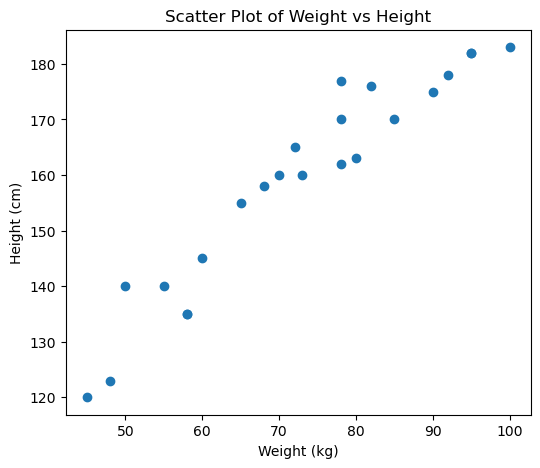

In [32]:
plt.figure(figsize=(6,5))
plt.scatter(df["Weight"], df["Height"])
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Scatter Plot of Weight vs Height")

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


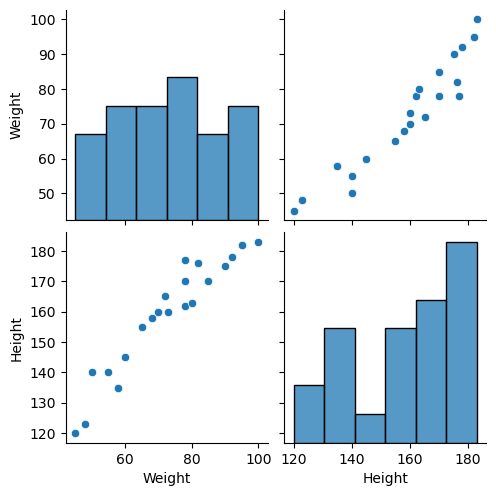

In [24]:
#visualization with seaborn
import seaborn as sns 
sns.pairplot(df)

In [44]:
#Feature selection dependent and Independent variable 
X_series = df["Weight"]
type(X)


pandas.core.frame.DataFrame

In [45]:
np.array(X_series).shape

(23,)

In [42]:
# independent should be in the form of dataframe of two dim array 
X = df[["Weight"]]
type(X)

pandas.core.frame.DataFrame

In [43]:
np.array(X).shape

(23, 1)

In [47]:
#Independent variable can be oe dimension 
y = df["Height"]
np.array(y).shape

(23,)

In [53]:
#importing train test split
from sklearn.model_selection import train_test_split

In [55]:
#splitting the data 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
X_train.shape

(17, 1)

In [58]:
#apply standardization because variables are having different units 
#apply on input feature
from sklearn.preprocessing import StandardScaler

In [60]:
#initialise scaler 
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.99277096],
       [ 1.70243234],
       [ 0.29065918],
       [-1.63448604],
       [ 1.3815748 ],
       [-1.18528549],
       [-0.86442795],
       [-0.22271288],
       [-1.50614302],
       [-0.54357041],
       [-0.03019836],
       [-0.35105589],
       [ 1.06071727],
       [ 0.54734521],
       [ 0.73985973],
       [ 1.18906028],
       [ 0.41900219]])

In [61]:
# assign these values to X_train (z = x-mean/sd)

X_train = scaler.fit_transform(X_train)

In [63]:
# to vaod data leakage using only transorm on X-test

X_test=  scaler.transform(X_test)

In [64]:
X_test

array([[ 0.29065918],
       [ 0.29065918],
       [-1.82700056],
       [ 1.3815748 ],
       [-0.09436986],
       [-0.99277096]])

In [66]:
# applying simple linear regression 
#importing model

from sklearn.linear_model import LinearRegression 

In [67]:
#Initialising regression 
regression = LinearRegression()

In [69]:
#tring to fit the model with X_series and y 
regression.fit(X_series,y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 45  58  48  60  70  78  80  90  95  78  82  95  58 100  85  78  65  72
  50  92  55  73  68].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [72]:
#tring to fit the model with X and y 
regression.fit(X_train,y_train)

LinearRegression()

In [74]:
#coefficient or slope 
regression.coef_

array([16.49229939])

In [76]:
#intercept
regression.intercept_

159.11764705882354

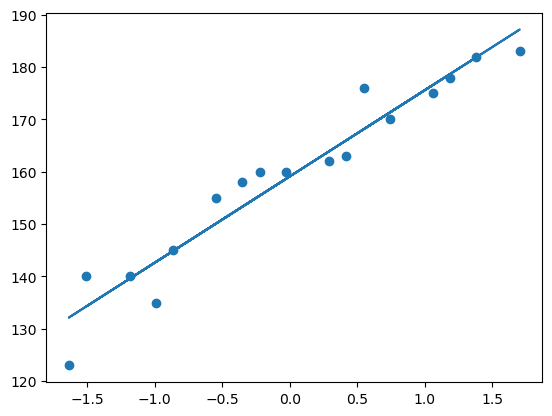

In [78]:
#plotting train data best fit line

plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

Predicted height output = intercept_ + coef_(X_test)

y_pred_test = 159.11 + 16.49(X_test)

In [80]:
#prediction for test data 
y_pred = regression.predict(X_test)

In [82]:
#performance metrics 
from sklearn.metrics import mean_squared_error
# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)

print("mean squared error", mse)

mean squared error 67.41021596787989


## R square
R^2 = 1 -SSR/SST

where R2= coefficient of determination 
SSR = Sum of square residual
SST = Sum of square total

In [83]:
from sklearn.metrics import r2_score 

In [86]:
score = r2_score(y_test, y_pred)
score

0.8696477534058293

In [87]:
#predicting for weight

regression.predict(scaler.transform([[72]]))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([157.56127102])

In [ ]:
# For 72 kg weight model is predicting 157 cm height.